<a href="https://colab.research.google.com/github/neerajkannam/MediSecKey/blob/main/Major.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import tensorflow
import keras
import os
import glob
from skimage import io
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset_path = '/content/drive/MyDrive/balz/balz crypto/Train'
class_names = ['Brain','Lungs','Brachial_Plexus']

In [ ]:
brain_path = os.path.join(dataset_path, class_names[0], '*')
brain_path = glob.glob(brain_path)

In [ ]:
lungs_path = os.path.join(dataset_path, class_names[1], '*')
lungs_path = glob.glob(lungs_path)


In [ ]:
brach_path = os.path.join(dataset_path, class_names[2], '*')
brach_path = glob.glob(brach_path)

In [ ]:
b_image = io.imread(brain_path[4])
l_image= io.imread(lungs_path[5])
bp_image = io.imread(brach_path[1])

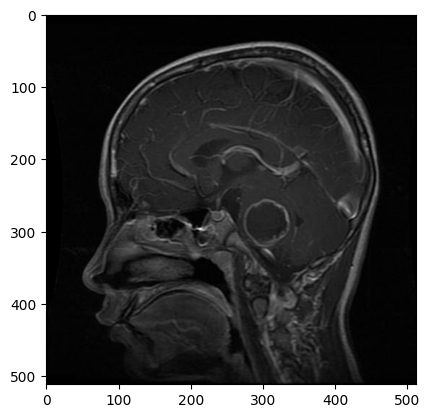

In [ ]:
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(b_image)


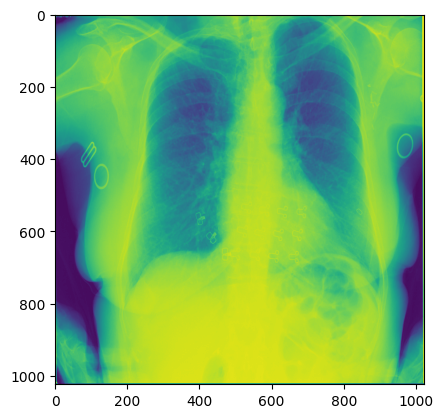

In [ ]:
i, (im2) = plt.subplots(1)
i.set_figwidth(15)
im2.imshow(l_image)

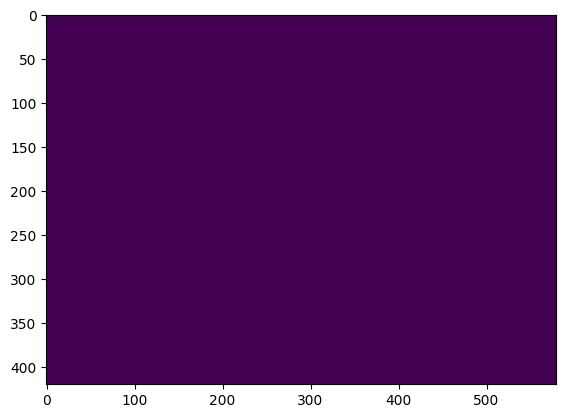

In [ ]:
i, (im3) = plt.subplots(1)
i.set_figwidth(15)
im3.imshow(bp_image)


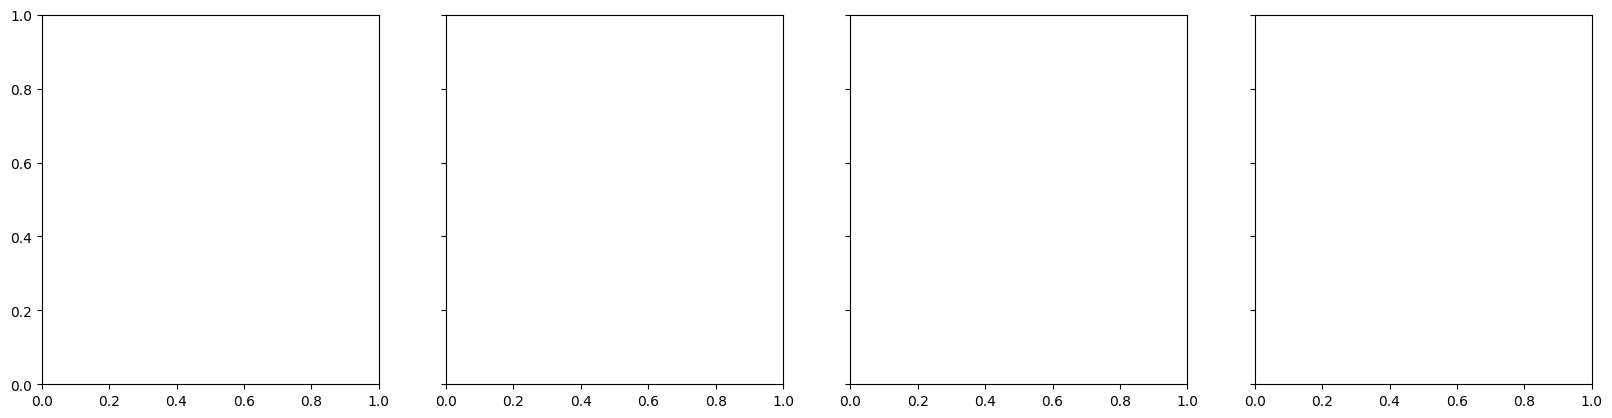

In [ ]:
i, (im11, im21, im31, im41) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20)

In [ ]:
im11.imshow(b_image)
im21.imshow(b_image[:, : , 0])
im31.imshow(b_image[:, : , 1])
im41.imshow(b_image[:, : , 2])
i.suptitle('Original & RGB image channels')

Text(0.5, 0.98, 'Original & RGB image channels')

<ipython-input-72-3aa17d75e32b>:1: RuntimeWarning: invalid value encountered in divide
  norm_image = (bp_image - np.min(bp_image)) / (np.max(bp_image) - np.min(bp_image))


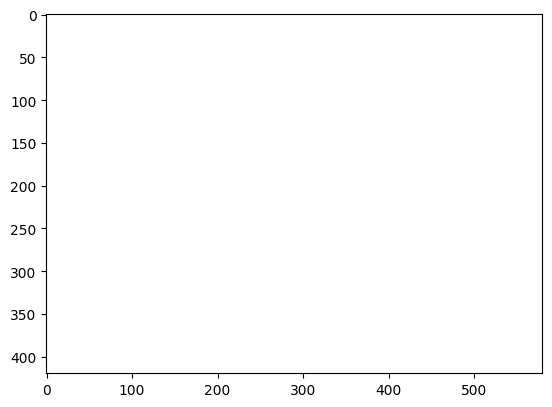

In [ ]:
norm_image = (bp_image - np.min(bp_image)) / (np.max(bp_image) - np.min(bp_image))
plt.imshow(norm_image)

In [ ]:
import tensorflow as tf
split_dir = '/content/drive/MyDrive/balz/balz crypto'
train_dir = f'{split_dir}/Train/'
val_dir = f'{split_dir}/Test/'

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                    labels='inferred',
                                                                    label_mode='categorical',
                                                                    batch_size=32,
                                                                    image_size=(32, 32))
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                                  labels='inferred',
                                                                  label_mode='categorical',
                                                                  batch_size=32,
                                                                  image_size=(32, 32))

Found 4839 files belonging to 3 classes.
Found 1005 files belonging to 3 classes.


In [ ]:
import tensorflow
import keras
import os
import glob
from skimage import io
from keras.preprocessing.image import ImageDataGenerator
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
import keras
from keras.layers import Dense, Conv2DTranspose, LeakyReLU, Reshape, BatchNormalization, Activation, Conv2D
from keras.models import Model, Sequential


In [ ]:
def image_generator():

    generator = Sequential()

    generator.add(Dense(256*4*4, input_shape = (100,)))
    generator.add(LeakyReLU())
    generator.add(Reshape((4,4,256)))

    generator.add(Conv2DTranspose(128,kernel_size=3, strides=2, padding = "same"))
    generator.add(LeakyReLU(alpha=0.2))


    generator.add(Conv2DTranspose(128,kernel_size=3, strides=2, padding = "same"))
    generator.add(LeakyReLU(alpha=0.2))

    generator.add(Conv2DTranspose(128,kernel_size=3, strides=2, padding = "same"))
    generator.add(LeakyReLU(alpha=0.2))

    generator.add(Conv2D(3,kernel_size=3, padding = "same", activation='tanh'))

    return(generator)

In [ ]:
model_generator = image_generator()

In [ ]:
model_generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              413696    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 128)         295040    
 anspose)                                                        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 16, 16, 128)       147584    
 Transpose)                                             

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
def generate_data_entry(n_shows):
  X = np.random.randn(100 * n_shows)
  X = X.reshape(n_shows, 100)
  return X

In [ ]:
def create_datas_fake(model_generator, n_shows):
  input = generate_data_entry(n_shows)
  X = model_generator.predict(input)
  y = np.zeros((n_shows, 1))
  return X,y

In [ ]:
sample_number = 4
X,_ = create_datas_fake(model_generator, sample_number)

1/1 [==============================] - 0s 387ms/step


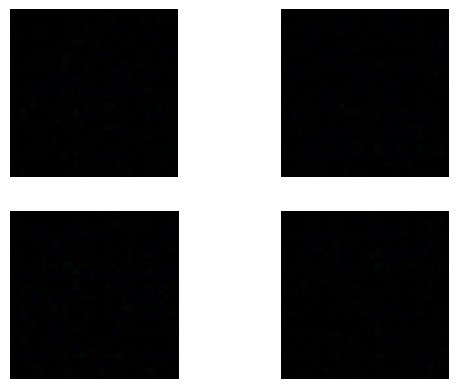

In [ ]:
# Visualizing results
for i in range(sample_number):
    plt.subplot(2, 2, 1 + i)
    plt.axis('off')
    plt.imshow(X[i])

In [ ]:
from keras.layers import Conv2D, Flatten, Dropout
from keras.optimizers import Adam


In [ ]:
def image_discriminator():

    discriminator = Sequential()
    discriminator.add(Conv2D(64, kernel_size=3, padding = "same", input_shape = (32,32,3)))
    discriminator.add(LeakyReLU(alpha=0.2))

    discriminator.add(Conv2D(128, kernel_size=3,strides=(2,2), padding = "same"))
    discriminator.add(LeakyReLU(alpha=0.2))

    discriminator.add(Conv2D(128, kernel_size=3,strides=(2,2), padding = "same"))
    discriminator.add(LeakyReLU(alpha=0.2))

    discriminator.add(Conv2D(256, kernel_size=3, strides=(2,2), padding = "same"))
    discriminator.add(LeakyReLU(alpha=0.2))

    discriminator.add(Flatten())
    discriminator.add(Dropout(0.4))
    discriminator.add(Dense(1, activation='sigmoid'))

    opt = Adam(lr=0.0002 ,beta_1=0.5)
    discriminator.compile(loss='binary_crossentropy', optimizer= opt , metrics = ['accuracy'])

    return(discriminator)

In [ ]:
model_discriminator = image_discriminator()
model_discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 256)        

In [ ]:
import tensorflow as tf
split_dir = '/content/drive/MyDrive/balz/balz crypto'
train_dir = f'{split_dir}/Train/'
val_dir = f'{split_dir}/Test/'

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                    labels='inferred',
                                                                    label_mode='categorical',
                                                                    batch_size=32,
                                                                    image_size=(32, 32))
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_dir,
                                                                  labels='inferred',
                                                                  label_mode='categorical',
                                                                  batch_size=32,
                                                                  image_size=(32, 32))

Found 4839 files belonging to 3 classes.
Found 1005 files belonging to 3 classes.


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
src_path = "/content/drive/MyDrive/balz/balz crypto/Test/"
sub_class = os.listdir(src_path)

In [ ]:
fig = plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

In [ ]:
path = os.path.join(src_path,sub_class[1])

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os
import tensorflow as tf
from keras.datasets import cifar10

In [ ]:
def load_images():
    import glob
    brain = glob.glob('/content/drive/MyDrive/balz/balz crypto/Train/Brain/*')
    lungs = glob.glob('/content/drive/MyDrive/balz/balz crypto/Train/Lungs/*')
    brach = glob.glob('/content/drive/MyDrive/balz/balz crypto/Train/Brachial_Plexus/*')

    data = []
    labels = []

    def load_and_append_images(image_list, label_value):
        for i in image_list:
            try:
                image = tf.keras.preprocessing.image.load_img(i, color_mode='rgb', target_size=(32, 32))
                image = np.array(image)
                data.append(image)
                labels.append(label_value)
                print(f"Loaded image: {i}")
            except Exception as e:
                print(f"Error loading image {i}: {e}")

    load_and_append_images(brain, 0)  # Brain images
    load_and_append_images(lungs, 1)  # Lungs images
    load_and_append_images(brach, 1)  # Brachial Plexus images

    data = np.array(data)
    labels = np.array(labels)

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

    # Train the brain
    brain_indices = np.where(y_train == 0)[0]
    X_train = X_train[brain_indices, :, :, :]

    # Normalize to float
    X_train = X_train.astype('float32')
    X_train = (X_train - 127.5) / 127.5

    return X_train

# Test the shape of the loaded images
print(load_images().shape)


Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/m1(65).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/gg (535).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/gg (42).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/m3 (76).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/gg (75).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/gg (409).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/m1(63).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/m3 (57).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/gg (408).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/gg (500).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/m2 (157).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/m2 (30).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/B

In [ ]:
import random

def load_real_data(dataset, n_shows):
  ix = np.random.randint(0, dataset.shape[0], n_shows)
  X = dataset[ix]
  y = np.ones((n_shows, 1))
  return X,y

In [ ]:
def load_data_fake(n_shows):
  X = np.random.rand(32 * 32 * 3 * n_shows)
  X = -1 + X * 2
  X = X.reshape((n_shows, 32,32,3))
  y = np.zeros((n_shows, 1))
  return X,y

In [ ]:
def train_discriminator(model, dataset, n_iterations=20, batch = 128):
  medio_batch = int(batch/2)

  for i in range(n_iterations):
    X_real, y_real = load_real_data(dataset, medio_batch)
    _, acc_real = model.train_on_batch(X_real, y_real)

    X_fake, y_fake = load_data_fake(medio_batch)
    _, acc_fake = model.train_on_batch(X_fake, y_fake)

    print(str(i+1) + ' Real:' + str(acc_real*100) + ', Fake:' + str(acc_fake*100))

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

dataset = load_images()
train_discriminator(model_discriminator, dataset)

def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan = Sequential()
    gan.add(generator)
    gan.add(discriminator)

    opt = Adam(lr=0.0002,beta_1=0.5)
    gan.compile(loss = "binary_crossentropy", optimizer = opt)

    return gan

gan = create_gan(model_discriminator,model_generator)
gan.summary()

Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/m1(65).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/gg (535).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/gg (42).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/m3 (76).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/gg (75).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/gg (409).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/m1(63).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/m3 (57).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/gg (408).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/gg (500).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/m2 (157).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/Brain/m2 (30).jpg
Loaded image: /content/drive/MyDrive/balz/balz crypto/Train/B

20 Real:100.0, Fake:100.0
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         1007363   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 1529860 (5.84 MB)
Trainable params: 1007363 (3.84 MB)
Non-trainable params: 522497 (1.99 MB)
_________________________________________________________________


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [ ]:
def show_generated_images(datos_fake, epoch):

  now = datetime.now()
  now = now.strftime("%Y%m%d_%H%M%S")

  # We make the data go from 0 to 1
  datos_fake = (datos_fake + 1) / 2.0

  for i in range(10):
    plt.imshow(datos_fake[i])
    plt.axis('off')
    name = str(epoch) + '_imagen_generated_' + str(i) + '.png'
    plt.savefig(name, bbox_inches='tight')
    plt.close()

acc_real_history = []
acc_fake_history = []
loss_real_history = []
loss_fake_history = []
def evaluate_y_save(model_generator, epoch, medio_dataset):

  # We save the model
  now = datetime.now()
  now = now.strftime("%Y%m%d_%H%M%S")
  name = str(epoch) + '_' + str(now)+"_model_generator_" + '.h5'
  model_generator.save(name)

  # We generate new data
  X_real,Y_real = load_real_data(dataset, medio_dataset)
  X_fake, Y_fake =  create_datas_fake(model_generator,medio_dataset)

  # We evaluate the model
  loss_real, acc_real = model_discriminator.evaluate(X_real, Y_real)
  loss_fake, acc_fake = model_discriminator.evaluate(X_fake, Y_fake)
  acc_real_history.append(acc_real)
  acc_fake_history.append(acc_fake)
  loss_real_history.append(loss_real)
  loss_fake_history.append(loss_fake)
  print('Accuracy Real:' + str(acc_real*100) + '% Accuracy Fake:' + str(acc_fake*100)+'%')

In [ ]:
def training(datos, model_generator, model_discriminator, epochs, n_batch, start = 0):
  dimension_batch = int(datos.shape[0]/n_batch)
  medio_dataset = int(n_batch/2)


  for epoch in range(start, start + epochs):

    for batch in range(n_batch):


      X_real,Y_real = load_real_data(dataset, medio_dataset)



      coste_discriminator_real, _ = model_discriminator.train_on_batch(X_real, Y_real)
      X_fake, Y_fake =  create_datas_fake(model_generator,medio_dataset)

      coste_discriminator_fake, _ = model_discriminator.train_on_batch(X_fake, Y_fake)


      X_gan = generate_data_entry(medio_dataset)
      Y_gan = np.ones((medio_dataset, 1))


      coste_gan = gan.train_on_batch(X_gan, Y_gan)


    if (epoch+1) % 2 == 0:
      evaluate_y_save(model_generator,epoch = epoch, medio_dataset= medio_dataset)
      show_generated_images(X_real, epoch = epoch)

training(dataset, model_generator, model_discriminator, epochs = 4, n_batch=32, start = 0)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 0s 163ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 68ms/step - loss: 0.3090 - accuracy: 1.0000
Accuracy Real:68.75% Accuracy Fake:100.0%
1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 80ms/step - loss: 0.3083 - accuracy: 1.0000
Accuracy Real:93.75% Accuracy Fake:100.0%


Text(0.5, 1.0, 'Performance of Real Images')

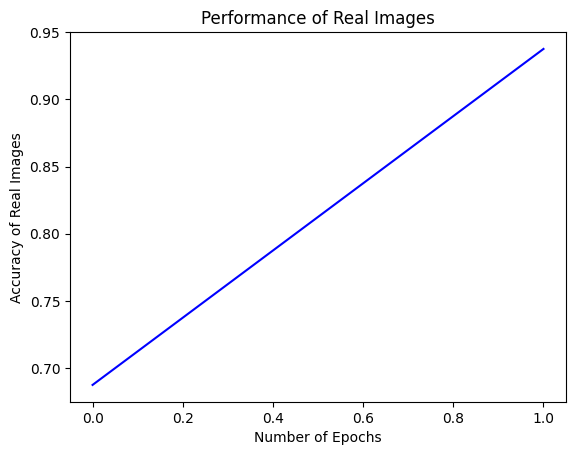

In [ ]:
plt.plot(acc_real_history,color='blue')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy of Real Images")
plt.title("Performance of Real Images")

Text(0.5, 1.0, 'Performance of Real Images')

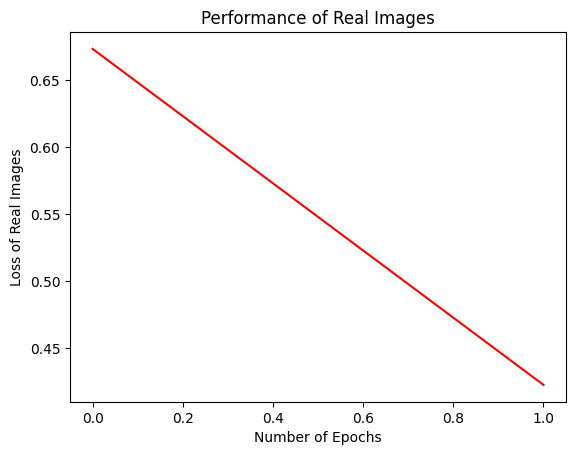

In [ ]:
plt.plot(loss_real_history,color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss of Real Images")
plt.title("Performance of Real Images")

Text(0.5, 1.0, 'Performance of Fake Images')

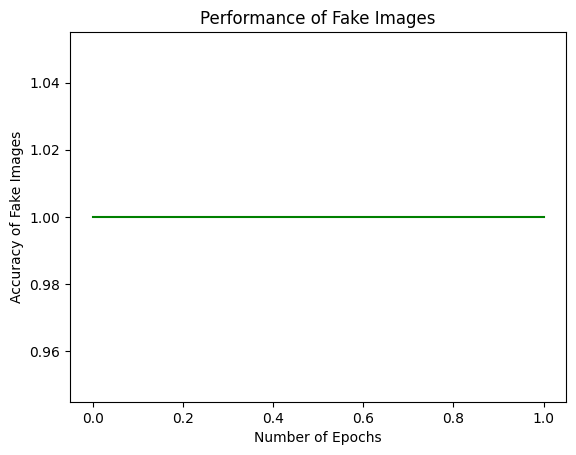

In [ ]:
plt.plot(acc_fake_history,color='green')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy of Fake Images")
plt.title("Performance of Fake Images")

Text(0.5, 1.0, 'Performance of Fake Images')

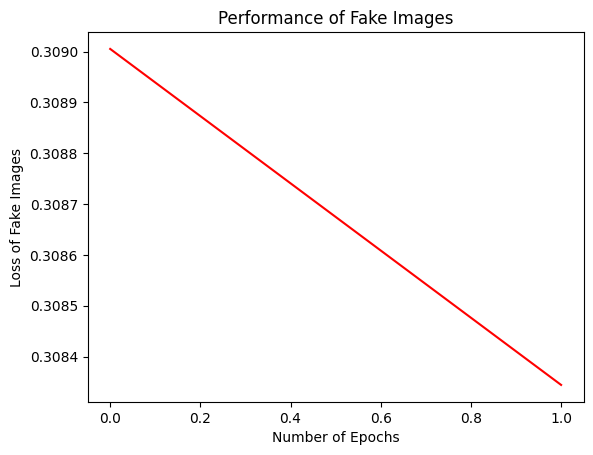

In [ ]:
plt.plot(loss_fake_history,color='red')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss of Fake Images")
plt.title("Performance of Fake Images")

2/2 [==============================] - 0s 147ms/step


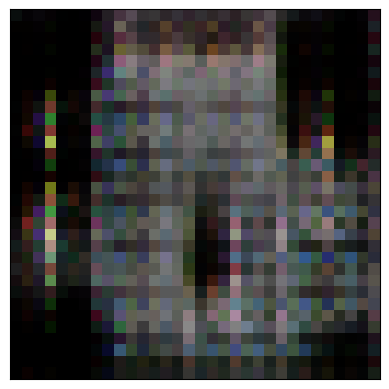

In [ ]:
X_fake, _ = create_datas_fake(n_shows=49, model_generator=model_generator)
X_fake = (X_fake+1)/2

for i in range(49):
    fig=plt.imshow(X_fake[i])
    fig.set_cmap('hot')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.savefig('/content/drive/MyDrive/balz/balz crypto/RSA/private_key (1).jpg', bbox_inches='tight')

In [ ]:
from PIL import Image

# Load the image
img = Image.open("/content/drive/MyDrive/balz/balz crypto/RSA/private_key (1).jpg")
resized_img = img.resize((256, 256))
resized_img.save("/content/drive/MyDrive/balz/balz crypto/RSA/private_key (1).jpg")

# Get the size of the image
width, height = img.size
width1,height1=resized_img.size

In [ ]:
#Implementing XOR Algorithm

#Initial Image
from matplotlib import pyplot as plt
from matplotlib import image as mpimg


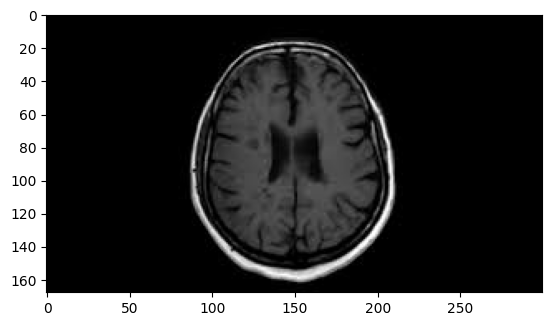

In [ ]:
image = mpimg.imread("/content/drive/MyDrive/balz/balz crypto/Test/Brain/11 no.jpg")
plt.imshow(image)
plt.show()


In [ ]:
import math
from PIL import Image

# Load the image
img = Image.open("/content/drive/MyDrive/balz/balz crypto/Test/Brain/11 no.jpg")
# Convert the image to grayscale
img = img.convert('L')

# Calculate the histogram of pixel values
histogram = img.histogram()
# Normalize the histogram
num_pixels = img.size[0] * img.size[1]
normalized_histogram = [float(x) / num_pixels for x in histogram]

# Calculate the entropy of the image
entropy = -sum([p * math.log2(p + 1e-10) for p in normalized_histogram])

# Print the entropy value
print(f"The entropy of the private key image is {entropy:.2f}")

The entropy of the private key image is 2.94


In [ ]:
#Encryption
from PIL import Image
import numpy as np

In [ ]:
def encrypt_image(image_path, private_key_path):
    img = Image.open(image_path).convert('RGB')
    private_key = Image.open(private_key_path).convert('RGB')
    private_key = private_key.resize(img.size)
    img_array = np.array(img)
    private_key_array = np.array(private_key)
    encrypted_array = np.bitwise_xor(img_array, private_key_array)
    encrypted_img = Image.fromarray(encrypted_array)
    encrypted_img.save('/content/drive/MyDrive/balz/balz crypto/RSA/Y1.jpg')
    image = mpimg.imread("/content/drive/MyDrive/balz/balz crypto/RSA/Y1.jpg")
    plt.imshow(image)
    plt.show()

In [ ]:
# Load the image
img = Image.open("/content/drive/MyDrive/balz/balz crypto/RSA/Y1.jpg")

# Convert the image to grayscale
img = img.convert('L')

# Calculate the histogram of pixel values
histogram = img.histogram()

# Normalize the histogram
num_pixels = img.size[0] * img.size[1]
normalized_histogram = [float(x) / num_pixels for x in histogram]

# Calculate the entropy of the image
entropy = -sum([p * math.log2(p + 1e-10) for p in normalized_histogram])

# Print the entropy value
print(f"The entropy of the private key image is {entropy:.2f}")


The entropy of the private key image is 7.52


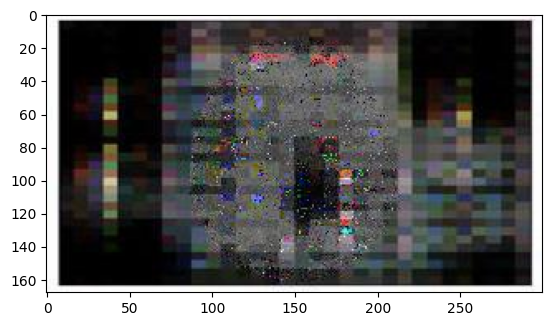

In [ ]:
encrypt_image('/content/drive/MyDrive/balz/balz crypto/Test/Brain/11 no.jpg', '/content/drive/MyDrive/balz/balz crypto/RSA/private_key (1).jpg')

In [ ]:
from PIL import Image

def known_plaintext_attack(plaintext_path, encrypted_path):
    # Load the known plaintext and encrypted images
    plaintext = Image.open(plaintext_path)
    encrypted = Image.open(encrypted_path)

    # Ensure that the images have the same size
    if plaintext.size != encrypted.size:
        raise ValueError("Images must have the same size")

    # Extract the pixel data from the images
    plaintext_pixels = plaintext.load()
    encrypted_pixels = encrypted.load()

    # Iterate over the pixels and compute the differences
    key = []
    for i in range(plaintext.size[0]):
        for j in range(plaintext.size[1]):
            r_p, g_p, b_p = plaintext_pixels[i, j]
            r_e, g_e, b_e = encrypted_pixels[i, j]
            key.append((r_p ^ r_e, g_p ^ g_e, b_p ^ b_e))

    # Convert the list of tuples to a one-dimensional list of integers
    flat_key = [val for tpl in key for val in tpl]

    # Convert the list to a bytes object
    data = bytes(flat_key)

    # Create a new image from the bytes object
    recovered_img = Image.frombytes(encrypted.mode, encrypted.size, data)

    # Save the recovered image
    recovered_img.save("recovered.png")
    image1 = mpimg.imread("/content/recovered.png")
    plt.imshow(image1)
    plt.show()

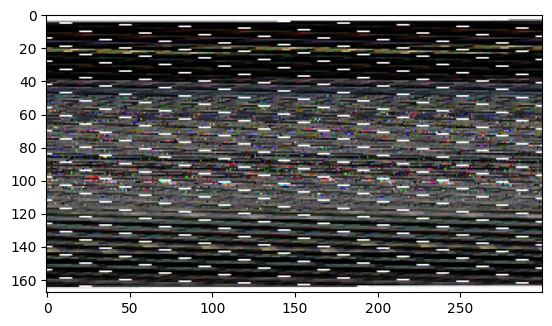

In [ ]:
known_plaintext_attack('/content/drive/MyDrive/balz/balz crypto/Test/Brain/11 no.jpg','/content/drive/MyDrive/balz/balz crypto/RSA/private_key (1).jpg')

In [ ]:
#Decryption
from PIL import Image
import numpy as np

In [ ]:
def decrypt_image(image_path, private_key_path):
    encrypted_img = Image.open(image_path).convert('RGB')
    private_key = Image.open(private_key_path).convert('RGB')
    private_key = private_key.resize(encrypted_img.size)
    encrypted_array = np.array(encrypted_img)
    private_key_array = np.array(private_key)
    decrypted_array = np.bitwise_xor(encrypted_array, private_key_array)
    decrypted_img = Image.fromarray(decrypted_array)
    decrypted_img.save('decrypted.png')
    image1 = mpimg.imread("/content/decrypted.png")
    plt.imshow(image1)
    plt.show()

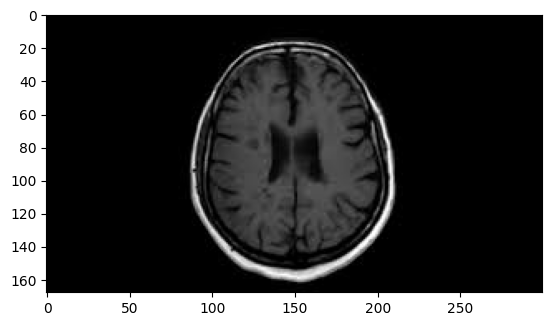

In [ ]:
image = mpimg.imread("/content/drive/MyDrive/balz/balz crypto/Test/Brain/11 no.jpg")
plt.imshow(image)
plt.show()

In [ ]:
#frequency analysis attack
from PIL import Image
import numpy as np

# Load the encrypted image
encrypted_image = Image.open("/content/drive/MyDrive/balz/balz crypto/RSA/private_key (1).jpg")
encrypted_pixels = np.array(encrypted_image)

# Compute the frequency of each color in the encrypted image
color_counts = {}
for i in range(encrypted_pixels.shape[0]):
    for j in range(encrypted_pixels.shape[1]):
        color = tuple(encrypted_pixels[i,j,:])
        if color in color_counts:
            color_counts[color] += 1
        else:
            color_counts[color] = 1

# Sort the colors by frequency
sorted_colors = sorted(color_counts.items(), key=lambda x: x[1], reverse=True)

# Print the most common colors
print("Most common colors:")
for i in range(10):
    print(sorted_colors[i])

Most common colors:
((0, 0, 0), 2236)
((1, 1, 1), 1007)
((255, 255, 255), 577)
((253, 253, 253), 501)
((2, 2, 2), 498)
((254, 254, 254), 401)
((3, 3, 3), 362)
((1, 0, 0), 213)
((4, 4, 4), 206)
((255, 254, 255), 175)


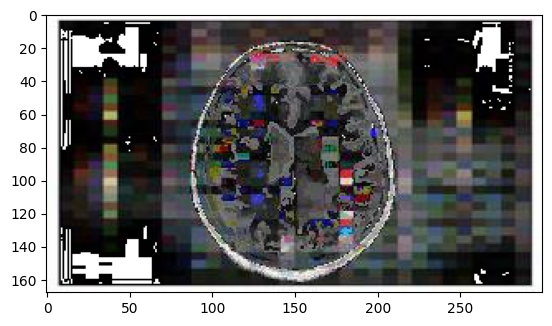

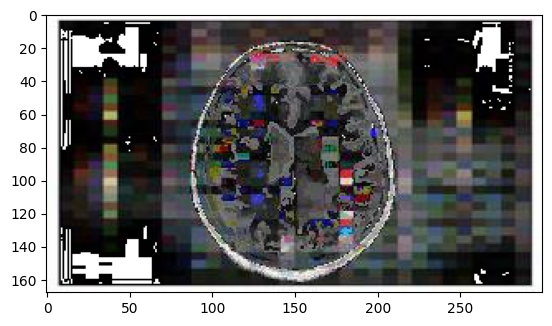

In [ ]:
# Replace the most common color with white
most_common_color = sorted_colors[0][0]
for i in range(encrypted_pixels.shape[0]):
    for j in range(encrypted_pixels.shape[1]):
        color = tuple(encrypted_pixels[i,j,:])
        if color == most_common_color:
            encrypted_pixels[i,j,:] = [255, 255, 255]

# Save the decrypted image
decrypted_image = Image.fromarray(encrypted_pixels)
decrypted_image.save("freq_decrypted_image.png")

image1 = mpimg.imread("/content/freq_decrypted_image.png")
plt.imshow(image1)
plt.show()

image1 = mpimg.imread("/content/freq_decrypted_image.png")
plt.imshow(image1)
plt.show()

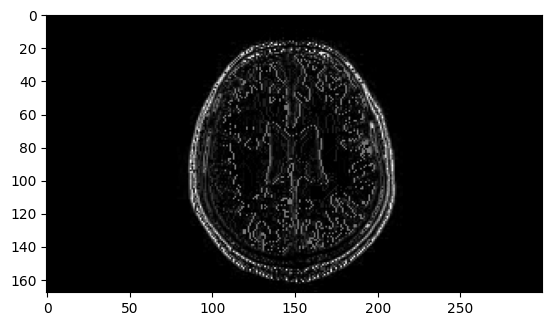

In [ ]:
#Differential Attack

# define the differential attack
def differential_attack(encrypted_image_path, diff_image_path):
    img = Image.open('/content/drive/MyDrive/balz/balz crypto/Test/Brain/11 no.jpg')
    pixels = img.load()

    # create the difference image
    diff_img = Image.new(img.mode, img.size)
    diff_pixels = diff_img.load()

    # compute the difference of each pixel with its right neighbor and store it in the diff image
    for i in range(img.size[0]-1):
        for j in range(img.size[1]):
            r1, g1, b1 = pixels[i, j]
            r2, g2, b2 = pixels[i+1, j]
            diff_pixels[i, j] = (r1 ^ r2, g1 ^ g2, b1 ^ b2)

    diff_img.save(diff_image_path)
    image1 = mpimg.imread("/content/diff_image.png")
    plt.imshow(image1)
    plt.show()

differential_attack("/content/encrypted_image.png", "diff_image.png")